In [241]:
# package imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [242]:
# loading data
data = pd.read_csv('mnist.csv')

# shuffling before splitting into training and testing sets
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

test = data[0:1000].T
Y_test = test[0]
X_test = test[1:n]
X_test = X_test / 255.

train = data[1000:m].T
Y_train = train[0]
X_train = train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [243]:
def initial_parameters():
    n_input = 784
    n_hidden = 63
    n_output = 10
    
    W1 = np.random.normal(loc=0, scale=np.sqrt(2/n_input), size=(n_hidden, n_input))
    b1 = np.zeros((n_hidden, 1))
    W2 = np.random.normal(loc=0, scale=np.sqrt(2/n_hidden), size=(n_output, n_hidden))
    b2 = np.zeros((n_output, 1))
    
    return W1, b1, W2, b2

# activation function for hidden layer
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_derivative(Z):
    return Z > 0

# activation function for output layer
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_derivative(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1    
    W2 = W2 - learning_rate * dW2  
    b2 = b2 - learning_rate * db2    
    return W1, b1, W2, b2

In [244]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, learning_rate, iterations):
    W1, b1, W2, b2 = initial_parameters()
    prev_acc = 0
    LR = learning_rate
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, LR)
        if (i + 1) % 1 == 0:
            print(f'Epochs: {i+1} | Learning rate: {LR}')
            predictions = get_predictions(A2)
            accuracy = get_accuracy(predictions, Y)
            if prev_acc == 0:
                percentage_change = accuracy * 100
                prev_acc = accuracy
            else:
                percentage_change = ((accuracy - prev_acc) / prev_acc) * 100
                prev_acc = accuracy
            print(f"Accuracy: {round(accuracy * 100, 2)}% | Change: {round(percentage_change, 2)}%\n")
        if accuracy >= 0.72:
            LR = 0.36
            if accuracy >= 0.81:
                LR = 0.27
                if accuracy >= 0.9:
                    LR = 0.18
        else:
            LR = learning_rate
    return W1, b1, W2, b2

In [245]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, learning_rate=0.45, iterations=100)

Epochs: 1 | Learning rate: 0.45
Accuracy: 7.73% | Change: 7.73%

Epochs: 2 | Learning rate: 0.45
Accuracy: 20.83% | Change: 169.49%

Epochs: 3 | Learning rate: 0.45
Accuracy: 33.72% | Change: 61.91%

Epochs: 4 | Learning rate: 0.45
Accuracy: 52.52% | Change: 55.74%

Epochs: 5 | Learning rate: 0.45
Accuracy: 60.37% | Change: 14.94%

Epochs: 6 | Learning rate: 0.45
Accuracy: 65.72% | Change: 8.87%

Epochs: 7 | Learning rate: 0.45
Accuracy: 65.08% | Change: -0.98%

Epochs: 8 | Learning rate: 0.45
Accuracy: 51.75% | Change: -20.49%

Epochs: 9 | Learning rate: 0.45
Accuracy: 50.05% | Change: -3.27%

Epochs: 10 | Learning rate: 0.45
Accuracy: 60.32% | Change: 20.5%

Epochs: 11 | Learning rate: 0.45
Accuracy: 71.75% | Change: 18.96%

Epochs: 12 | Learning rate: 0.45
Accuracy: 76.72% | Change: 6.92%

Epochs: 13 | Learning rate: 0.36
Accuracy: 78.39% | Change: 2.17%

Epochs: 14 | Learning rate: 0.36
Accuracy: 78.65% | Change: 0.33%

Epochs: 15 | Learning rate: 0.36
Accuracy: 81.31% | Change: 3.

In [246]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def wrong_test_predictions(index, W1, b1, W2, b2):
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    if prediction != label:
        print("Prediction: ", prediction)
        print("Label: ", label)
        current_image = current_image.reshape((28, 28)) * 255
        plt.gray()
        plt.imshow(current_image, interpolation='nearest')
        plt.show()

In [247]:
# making predictions on test data to see how model generalizes
test_set_predictions = make_predictions(X_test, W1, b1, W2, b2)
print(f"Accuracy on test data: {round(get_accuracy(test_set_predictions, Y_test)*100, 2)}%")

Accuracy on test data: 87.6%


Prediction:  [4]
Label:  9


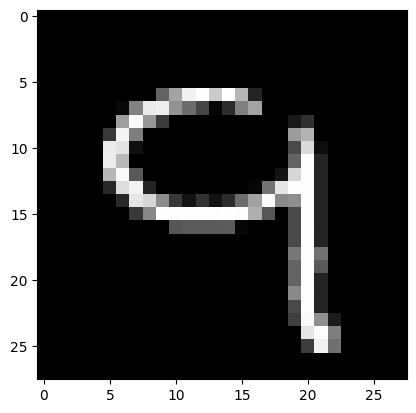

Prediction:  [3]
Label:  8


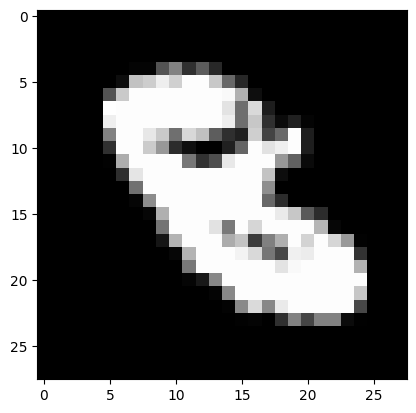

Prediction:  [2]
Label:  4


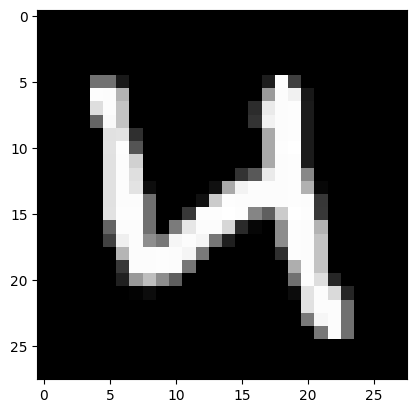

Prediction:  [8]
Label:  9


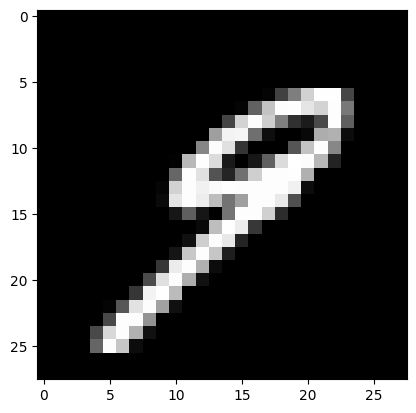

Prediction:  [9]
Label:  3


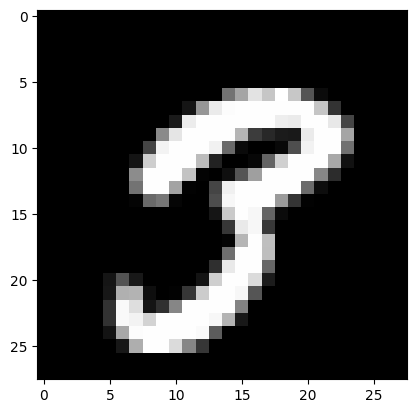

Prediction:  [7]
Label:  9


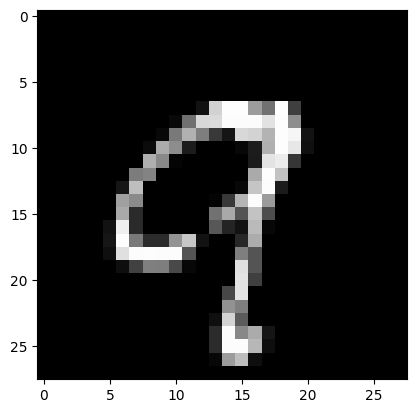

Prediction:  [7]
Label:  1


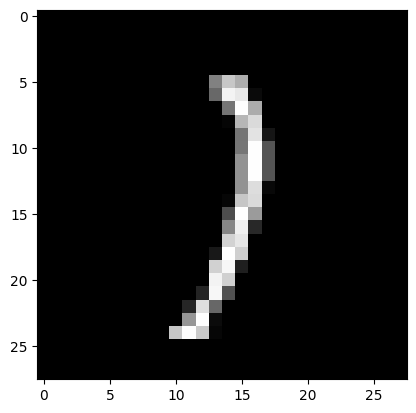

Prediction:  [5]
Label:  8


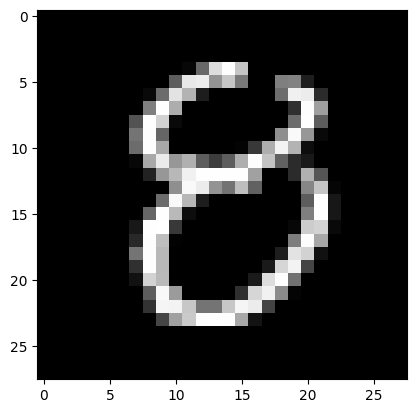

Prediction:  [5]
Label:  0


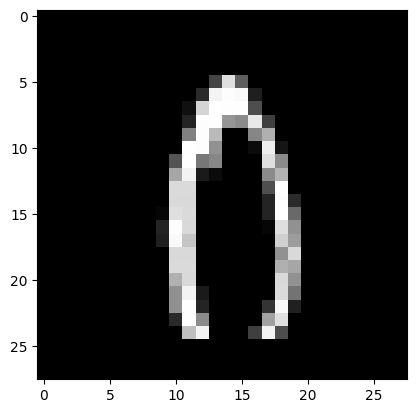

Prediction:  [6]
Label:  0


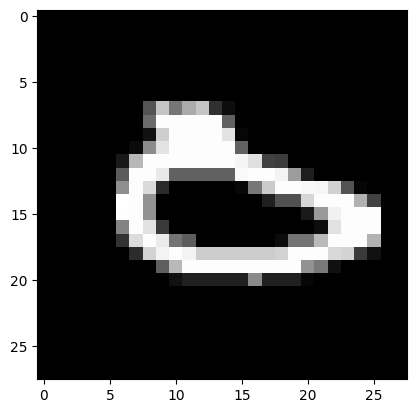

Prediction:  [3]
Label:  8


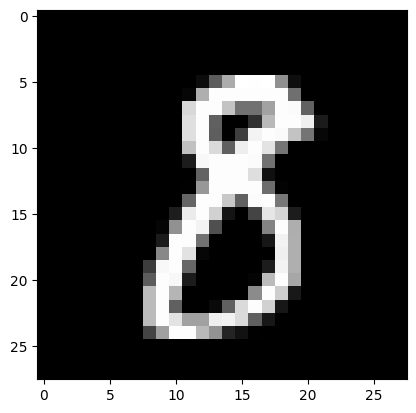

Prediction:  [0]
Label:  2


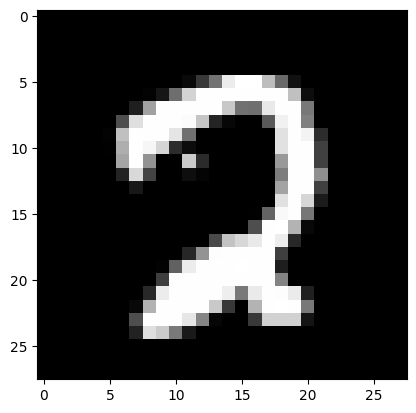

In [248]:
# let's look at SOME predictions we got wrong
for i in range(100):
    wrong_test_predictions(i, W1, b1, W2, b2)